# Exercice 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
anonyme =pd.read_csv('grav.csv')
anonyme.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [3]:
X = anonyme.iloc[0:len(anonyme),0]
#selection de deuxième colonnes de notre dataset
Y = anonyme.iloc[0:len(anonyme),1]
print(X,Y)

0    100
1    120
2    150
3    180
4    200
5    250
6    300
Name: height, dtype: int64 0     8.967
1    11.989
2    15.852
3    16.991
4    20.284
5    24.228
6    30.580
Name: seconds squared, dtype: float64


Text(0, 0.5, 'seconds squared')

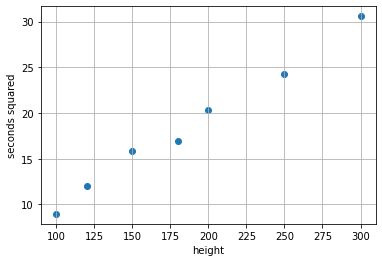

In [4]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.xlabel('height')
plt.ylabel('seconds squared')

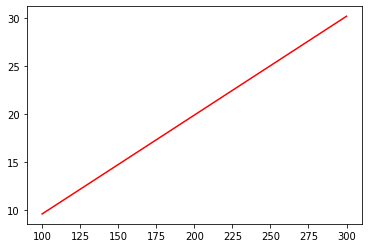

In [5]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
    return slope * x + intercept
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

the mean gravity value =  10.172358622661353 m/s^2


Text(0, 0.5, 'gravity')

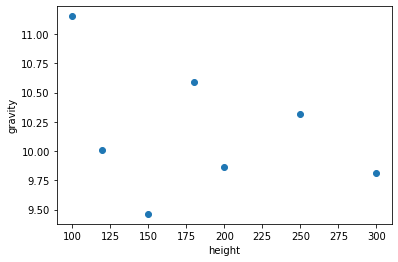

In [6]:
gra= np.array(X/Y)
plt.scatter(X,gra)
gravity= gra.mean()
print('the mean gravity value = ',gravity, 'm/s^2')
plt.xlabel('height')
plt.ylabel('gravity')

# Exercice 2 :

In [11]:
!pip install pyreadstat

     |████████████████████████████████| 2.1 MB 387 kB/s eta 0:00:01


In [7]:
import pandas as pd
df = pd.read_spss('test_scores.sav')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [8]:
X = df.iloc[ :,9:10].values
y = df.iloc[:, -1].values

In [9]:
print(X)

[[62.]
 [66.]
 [64.]
 ...
 [45.]
 [46.]
 [41.]]


In [10]:
print(y)

[72. 79. 76. ... 51. 53. 48.]


# Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Simple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)

# Visualising the Training set results

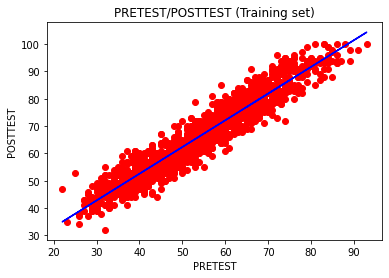

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('PRETEST/POSTTEST (Training set)')
plt.xlabel('PRETEST')
plt.ylabel('POSTTEST')
plt.show()

In [15]:
regressor.predict([[62]])

array([74.06654787])

In [16]:
regressor.predict([[66]])

array([77.97627517])

# Exercice 3

charger les données dans une pandas dataframe  en utilisant pd.DataFrame. Nous imprimons ensuite les 5 premières lignes des données en utilisant head()

In [17]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [18]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Les prix de la maison indiqués par la variable MEDV est notre variable cible 

In [19]:
boston['MEDV'] = boston_dataset.target


# Data preprocessing


nous créons une matrice de corrélation qui mesure les relations linéaires entre les variables en utilisant la fonction corr de la bibliothèque de dataframe pandas.

<AxesSubplot:>

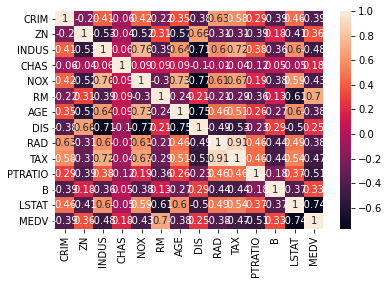

In [20]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Preparing the data for training the model


Nous concaténons les colonnes LSTAT et RM en utilisant np. c_ fourni par numpy library.

In [21]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

# Splitting the data into training and testing sets


nous divisons les données en ensembles training et testing sets. Nous formons le modèle avec 80 % des échantillons et nous testons avec les 20 % restants.nous utilisons la fonction train_test_split fournie par la bibliothèque scikit-learn.

imprimer les tailles de nos ensembles training et test set pour vérifier si la division s’est bien produite.

In [22]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Training and testing the model


utiliser le LinearRegression de scikit-learn pour former notre modèle à la fois sur les training et test sets.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# Model evaluation


Nous évaluerons notre modèle à l’aide de RMSE et de R2-score.

In [24]:
from sklearn.metrics import r2_score

In [25]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952
